# 1. **Business Understanding**

The Titanic dataset contains information about the passengers on the Titanic, including whether they survived or not.

The main goal:

**We want to find out what factors affected survival and build models to predict survival based on different factors. This can help us find any unfairness or differences in the data and create models to predict survival.**

# 2. **Analytic Approach**

Selecting the right analytic approach to solve the problem. In this project the problem is about predicting the survival based on different factors. So we are going to use:
1. Logistic Regression 
2. Decision Tree
3. Light Gradient Boosting Machine(Light GBM)
4. Neural Networks

# 3. **Data Requirements**

- Input variables (features) like age, sex, passenger class,etc.

- Output variable (target) like survival status.

- Training data to teach the algorithm.

- Testing data to check the algorithm's performance.

- Metrics to evaluate the algorithm's performance like accuracy, precision, recall, etc.

# 4. **Data Collection**

After the initial data collection is performed, an assessment by the data scientist takes place to determine whether or not they have what they need

# 5. **Data Understanding**

Data understanding encompasses all activities related to constructing the data set.

## **Import Libraries**

In [2]:
import pandas as pd  # Import the pandas library for data manipulation and analysis
import numpy as np  # Import the numpy library for fundamental package for scientific computing
import seaborn as sns  # Import the seaborn library for statistical data visualization
import matplotlib.pyplot as plt  # Import the matplotlib library for comprehensive visualization

# Import the necessary libraries from scikit-learn
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Import the necessary libraries
import tensorflow as tf
import matplotlib.image as mpimg
import graphviz
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore') #suppress and ignore warnings

In [3]:
# Read Train dataset
train = pd.read_csv('train.csv')

# Print first 5 rows for train dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Print rows and columns for train data
rows, cols = train.shape
print ('Number of Rows:',rows ,'\n', 'Number of Columns:',cols)

Number of Rows: 891 
 Number of Columns: 12


In [5]:
# Check any missing values
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [6]:
# Create new variable for missing values in train set 
train_mv = train[['Age','Cabin','Embarked']]

# Print info for assigned train
train_mv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Cabin     204 non-null    object 
 2   Embarked  889 non-null    object 
dtypes: float64(1), object(2)
memory usage: 21.0+ KB


**Missing Values:**

 1.   Age float64
 
 2.  Cabin object 
 
 3.  Embarked object 

In [7]:
# Read Test dataset
test = pd.read_csv('test.csv')

# Print first 5 rows for test dataset
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
# Print rows and columns for test data
rows, cols = test.shape

print ('Number of Rows:',rows ,'\n', 'Number of Columns:',cols)

Number of Rows: 418 
 Number of Columns: 11


In [9]:
# Check any missing values
test.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [10]:
# Create new variable for missing values in test set 
test_mv = test[['Age','Fare','Cabin']]

# Print info for assigned test
test_mv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     332 non-null    float64
 1   Fare    417 non-null    float64
 2   Cabin   91 non-null     object 
dtypes: float64(2), object(1)
memory usage: 9.9+ KB


 **Missing values:**

 1.  Age float64

 2.  Fare float64
 
 3.  Cabin object 

Both dataset have missing values, Let's examine and solve

In [11]:
# print missing values for train set
print ('-- Missing values for train set--')
print (train_mv.isnull().sum())

# print missing values for test set
print ('\n-- Missing values for test set--')
print (test_mv.isnull().sum())

-- Missing values for train set--
Age         177
Cabin       687
Embarked      2
dtype: int64

-- Missing values for test set--
Age       86
Fare       1
Cabin    327
dtype: int64


In [12]:
# replacing any missing values in the 'Age' column of two dataframes train_mv and test_mv with the mean value of the 'Age' column
train['Age'].fillna(train_mv['Age'].mean(), inplace=True)

test['Age'].fillna(test_mv['Age'].mean(), inplace=True)

Drop 'Cabin' column because it is have many missing values.

In [13]:
# Dropping the 'Cabin' column from the 'train' and 'test' titanic data
train.drop('Cabin',inplace=True,axis=1)
test.drop('Cabin',inplace=True,axis=1)

In [14]:
# Find the top 'Embarked' column
train['Embarked'].value_counts().idxmax()

# Replace with the top 'Embarked' column value
train['Embarked'].replace(np.nan,'S',inplace=True)

In [15]:
# replacing missing values in the 'Fare' column with the mean value of the 'Fare' column
test['Fare'].fillna(test_mv['Fare'].mean(), inplace=True)

The missing values for the two datasets have been solved

# 6. **Data Preparation** 

Exploratory Data Analysis (EDA)

In [16]:
# descriptive statistics of a train data
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
# descriptive statistic include non-numeric columns for train data
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,646
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,13.002015,1.102743,0.806057,NaN,49.693429,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,29.699118,0.000000,0.000000,NaN,14.454200,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN


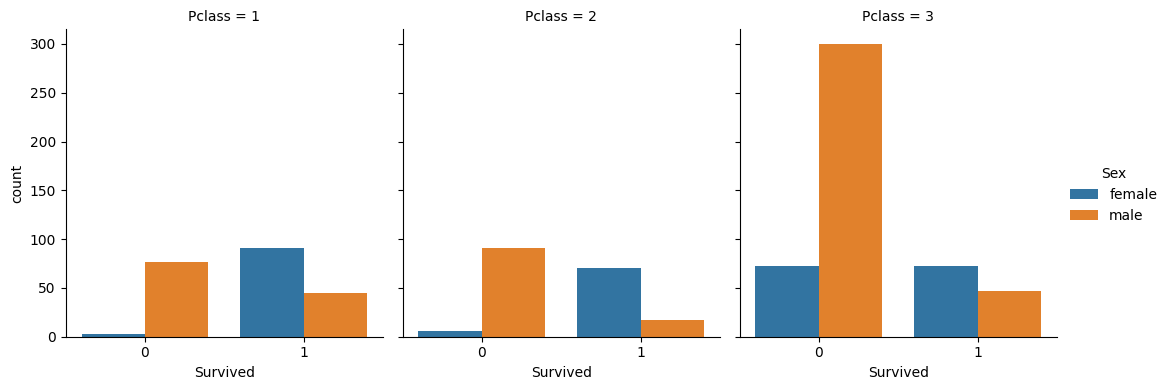

In [18]:
# Plot showing the counts of passengers who survived and didn't survive, categorized by gender, for each passenger class.
sns.catplot(x="Survived", hue="Sex", col="Pclass", hue_order=['female', 'male'], data=train, kind="count", height=4, aspect=.9)

Based on the graph, you can see the number of male and female passengers in each passenger class (Pclass) and whether they survived or not. The graph shows that a higher proportion of female passengers survived in each passenger class compared to male passengers.

Let's calculate and display survival rates for male and female passengers within each passenger class (Pclass) separately.

In [19]:
#calculates the survival rates for male and female passengers in each passenger class (Pclass) of the Titanic dataset.

def calculate_survival_rates(train, pclass):
    """Calculate the survival rate for male and female passengers in a given passenger class."""
    # Filter the train DataFrame to include only rows with the given pclass value
    class_data = train[train['Pclass'] == pclass]

    # Calculate the number of male and female passengers in the subset of the data
    num_male_class = class_data[class_data['Sex'] == 'male'].shape[0]
    num_female_class = class_data[class_data['Sex'] == 'female'].shape[0]

    # Calculate the number of male and female survivors
    num_male_survived_class = class_data[class_data['Sex'] == 'male'][class_data['Survived'] == 1].shape[0]
    num_female_survived_class = class_data[class_data['Sex'] == 'female'][class_data['Survived'] == 1].shape[0]

    # Calculate the survival rate for male and female passengers
    male_survival_rate = num_male_survived_class / num_male_class if num_male_class != 0 else 0
    female_survival_rate = num_female_survived_class / num_female_class if num_female_class != 0 else 0

    # Calculate the mean survival rate for male and female passengers, grouped by sex
    class_grouped = class_data.groupby('Sex')['Survived'].mean().round(2).mul(100).astype(str) + '%'

    return male_survival_rate, female_survival_rate, class_grouped

# Let's calculate survival rates for each passenger class (Pclass)
for pclass in range(1, 4):
    male_survival_rate, female_survival_rate, class_grouped = calculate_survival_rates(train, pclass)
    print(f'Survival rates for Pclass {pclass}:')
    
    print(f'\nMale survival rate: {male_survival_rate:.2%}')
    
    print(f'Female survival rate: {female_survival_rate:.2%}\n')
    
    print(f'Survival rates grouped by: \n{class_grouped}\n')

Survival rates for Pclass 1:

Male survival rate: 36.89%
Female survival rate: 96.81%

Survival rates grouped by: 
Sex
female    97.0%
male      37.0%
Name: Survived, dtype: object

Survival rates for Pclass 2:

Male survival rate: 15.74%
Female survival rate: 92.11%

Survival rates grouped by: 
Sex
female    92.0%
male      16.0%
Name: Survived, dtype: object

Survival rates for Pclass 3:

Male survival rate: 13.54%
Female survival rate: 50.00%

Survival rates grouped by: 
Sex
female                  50.0%
male      14.000000000000002%
Name: Survived, dtype: object



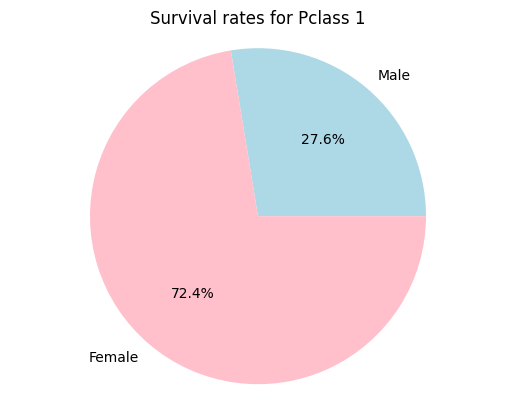

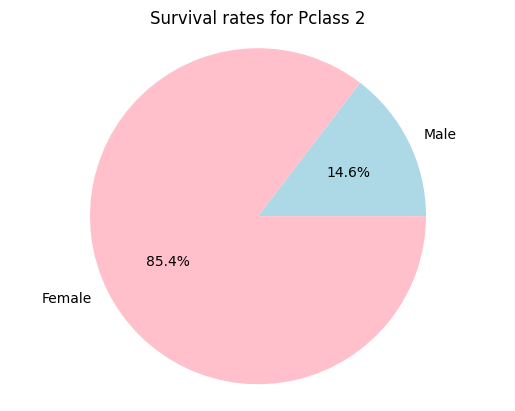

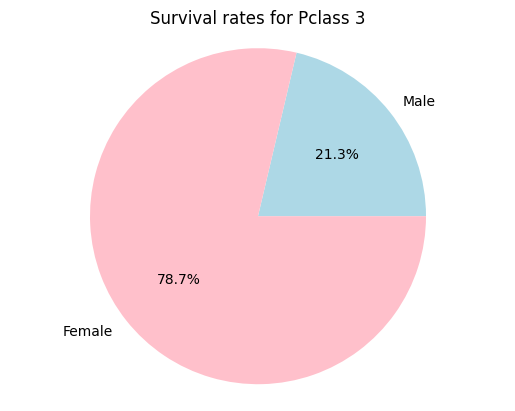

In [20]:
# calculates the survival rates for male and female passengers in each passenger class (Pclass) of the Titanic dataset and displays the results in a pie chart.

def calculate_survival_rates(train, pclass):
    """Calculate the survival rate for male and female passengers in a given passenger class."""
    # Filter the train DataFrame to include only rows with the given pclass value
    class_data = train[train['Pclass'] == pclass]

    # Calculate the number of male and female passengers in the subset of the data
    num_male_class = class_data[class_data['Sex'] == 'male'].shape[0]
    num_female_class = class_data[class_data['Sex'] == 'female'].shape[0]

    # Calculate the number of male and female survivors
    num_male_survived_class = class_data[class_data['Sex'] == 'male'][class_data['Survived'] == 1].shape[0]
    num_female_survived_class = class_data[class_data['Sex'] == 'female'][class_data['Survived'] == 1].shape[0]

    # Calculate the survival rate for male and female passengers
    male_survival_rate = num_male_survived_class / num_male_class if num_male_class != 0 else 0
    female_survival_rate = num_female_survived_class / num_female_class if num_female_class != 0 else 0

    # Create a pie chart of the survival rates for male and female passengers
    labels = ['Male', 'Female']
    sizes = [male_survival_rate, female_survival_rate]
    colors = ['lightblue', 'pink']
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
    plt.axis('equal')
    plt.title(f'Survival rates for Pclass {pclass}')
    plt.show()

# Let's calculate survival rates for each passenger class (Pclass)
for pclass in range(1, 4):
    calculate_survival_rates(train, pclass)

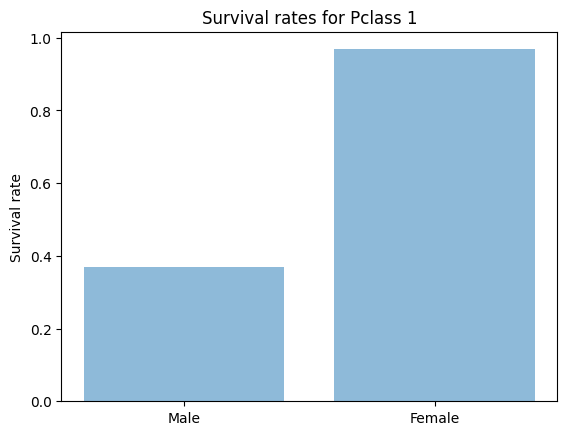

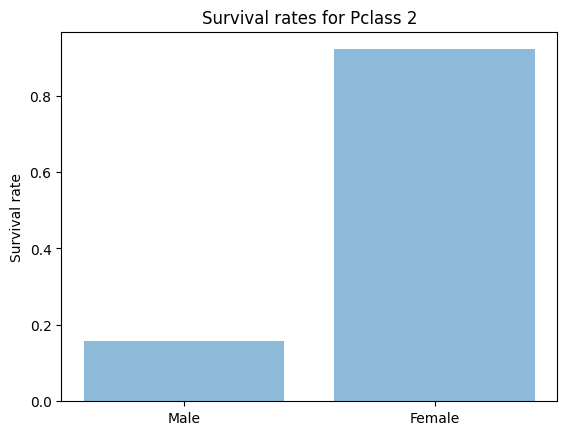

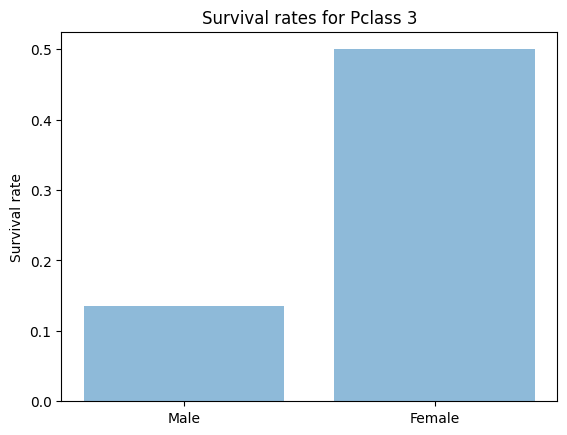

In [21]:
# calculates the survival rates for male and female passengers in each passenger class (Pclass) of the Titanic dataset and displays the results in a bar chart.

def calculate_survival_rates(train, pclass):
    """Calculate the survival rate for male and female passengers in a given passenger class."""
    # Filter the train DataFrame to include only rows with the given pclass value
    class_data = train[train['Pclass'] == pclass]

    # Calculate the number of male and female passengers in the subset of the data
    num_male_class = class_data[class_data['Sex'] == 'male'].shape[0]
    num_female_class = class_data[class_data['Sex'] == 'female'].shape[0]

    # Calculate the number of male and female survivors
    num_male_survived_class = class_data[class_data['Sex'] == 'male'][class_data['Survived'] == 1].shape[0]
    num_female_survived_class = class_data[class_data['Sex'] == 'female'][class_data['Survived'] == 1].shape[0]

    # Calculate the survival rate for male and female passengers
    male_survival_rate = num_male_survived_class / num_male_class if num_male_class != 0 else 0
    female_survival_rate = num_female_survived_class / num_female_class if num_female_class != 0 else 0

    # Create a bar chart of the survival rates for male and female passengers
    labels = ['Male', 'Female']
    sizes = [male_survival_rate, female_survival_rate]
    y_pos = np.arange(len(labels))
    plt.bar(y_pos, sizes, align='center', alpha=0.5)
    plt.xticks(y_pos, labels)
    plt.ylabel('Survival rate')
    plt.title(f'Survival rates for Pclass {pclass}')
    plt.show()

# Let's calculate survival rates for each passenger class (Pclass)
for pclass in range(1, 4):
    calculate_survival_rates(train, pclass)

Based on the pie chart and bar chart for survived rate, we can make observations and reports:

1. The survival rate for both male and female passengers increases as the passenger class increases. This suggests that there may have been a correlation between passenger class and survival, with higher passenger classes having a higher survival rate.

2. The survival rate for female passengers in first and second class is similar, while the survival rate for female passengers in third class is significantly lower. This suggests that there may have been other factors, in addition to gender, that influenced the survival of female passengers in third class.

In [22]:
# Get the column names of the train dataset
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

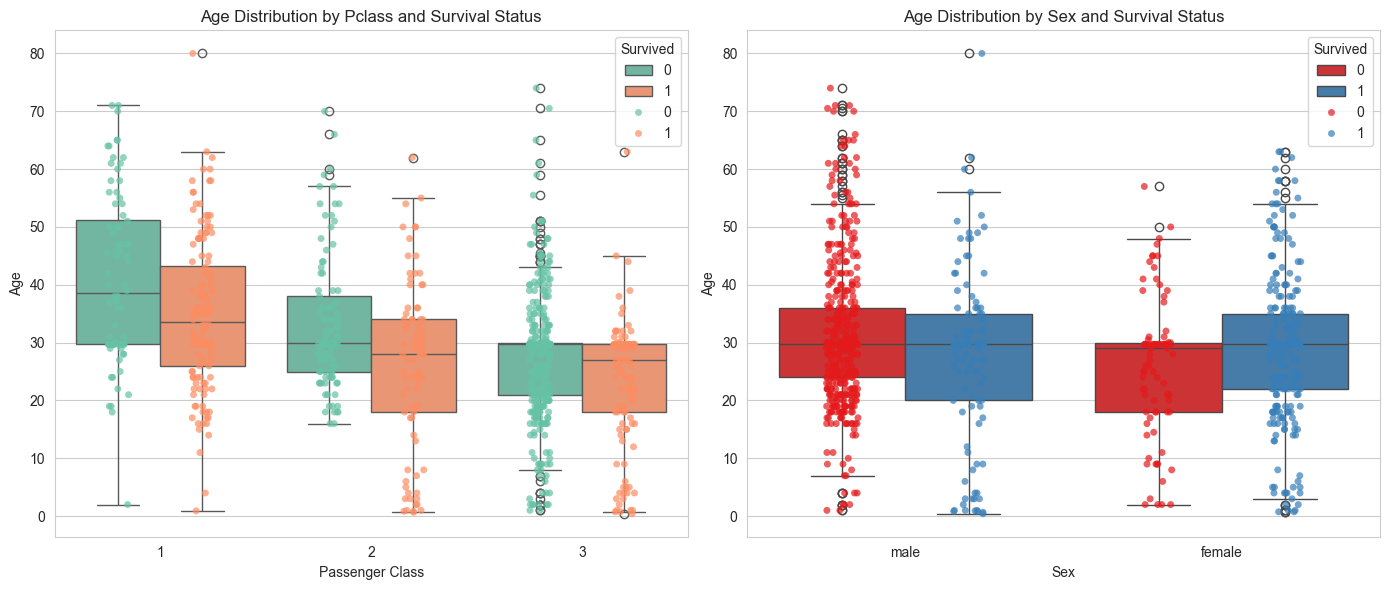

In [23]:
# Set the style of the plots to a white background with gridlines
sns.set_style('whitegrid')

# Create a figure with a size of 14 inches wide and 6 inches tall
plt.figure(figsize=(14, 6))

# Create the first subplot for Pclass and Age distribution
plt.subplot(1, 2, 1)
ax1 = sns.boxplot(x='Pclass', y='Age', data=train, hue='Survived', palette='Set2')  
sns.stripplot(x="Pclass", y="Age", data=train, jitter=True, hue='Survived', dodge=True, alpha=0.7, palette='Set2')  
ax1.set_title('Age Distribution by Pclass and Survival Status')
ax1.set_xlabel('Passenger Class')
ax1.set_ylabel('Age')
ax1.legend(title='Survived', loc='upper right')

# Create the second subplot for Sex and Age distribution
plt.subplot(1, 2, 2)
ax2 = sns.boxplot(x='Sex', y='Age', data=train, hue='Survived', palette='Set1')  
sns.stripplot(x="Sex", y="Age", data=train, jitter=True, hue='Survived', dodge=True, alpha=0.7, palette='Set1')  
ax2.set_title('Age Distribution by Sex and Survival Status')
ax2.set_xlabel('Sex')
ax2.set_ylabel('Age')
ax2.legend(title='Survived', loc='upper right')

# Adjust the layout of the plots to prevent them from overlapping
plt.tight_layout()

# Display the plots
plt.show()

Based on this two boxplot: 

- Passengers in higher passenger classes tend to be older than passengers in lower classes.This is evident in the first box plot, where the median age of passengers in first class is higher than that of passengers in second and third class.

- Female passengers tend to be older than male passengers. This is evident in the second box plot, where the median age of female passengers is higher than that of male passengers.

- Survival status is also a factor in age distribution. In both plots, survivors tend to be younger than non-survivors.


In [24]:
# Create a new column called 'Family' in the train dataset
# by adding the values in the 'SibSp' and 'Parch' columns
train['Family'] = train['SibSp'] + train['Parch']

# Create a new column called 'Family' in the test dataset
# by adding the values in the 'SibSp' and 'Parch' columns
test['Family'] = test['SibSp'] + test['Parch']

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [25]:
# Displaying the first few rows of the 'test' dataset
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,2


count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

Based on the range of the Age column in the train data, which is between 0 min and 80 max,
we can choose appropriate cut points for creating the Age_categories feature.



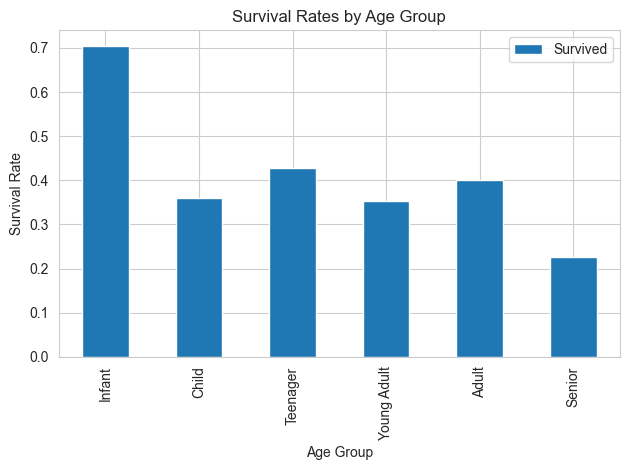

In [26]:
# Display the descriptive statistics for the 'Age' column in the 'train' dataframe
print(train['Age'].describe())
print('\nBased on the range of the Age column in the train data, which is between 0 min and 80 max,\nwe can choose appropriate cut points for creating the Age_categories feature.\n')
# Fill missing values in the 'Age' column with the mean value of the 'Age' column
# This helps to ensure that the 'Age' column has a more realistic value for missing data, rather than an arbitrary value.
train["Age"] = train["Age"].fillna(train["Age"].mean())
test["Age"] = test["Age"].fillna(test["Age"].mean())

# Create a new column called 'Age_categories' by categorizing the 'Age' column into different age groups
# This helps to simplify the data and make it easier to interpret, but it may also introduce bias or distort the distribution of the data.
# Therefore, it's important to carefully consider the benefits and limitations of categorizing the 'Age' column, and to choose the cut points and labels that are most appropriate for the specific analysis or model being built.
cut_points = [0, 5, 12, 18, 35, 60, 100]
label_names = ["Infant", "Child", "Teenager", "Young Adult", "Adult", "Senior"]
train["Age_categories"] = pd.cut(train["Age"], cut_points, labels=label_names)
test["Age_categories"] = pd.cut(test["Age"], cut_points, labels=label_names)

# Create a pivot table with the 'Age_categories' as the index and the 'Survived' column as the values
# This helps to visualize the survival rates for each age group
pivot = train.pivot_table(index="Age_categories", values="Survived", aggfunc="mean")

# Plot the pivot table as a bar chart
# This helps to visualize the survival rates for each age group, with the height of each bar representing the mean survival rate for that age group
pivot.plot.bar()
plt.title("Survival Rates by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Survival Rate")
plt.tight_layout()
plt.show()

In [27]:
# Displaying information about the 'train' dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   PassengerId     891 non-null    int64   
 1   Survived        891 non-null    int64   
 2   Pclass          891 non-null    int64   
 3   Name            891 non-null    object  
 4   Sex             891 non-null    object  
 5   Age             891 non-null    float64 
 6   SibSp           891 non-null    int64   
 7   Parch           891 non-null    int64   
 8   Ticket          891 non-null    object  
 9   Fare            891 non-null    float64 
 10  Embarked        891 non-null    object  
 11  Family          891 non-null    int64   
 12  Age_categories  891 non-null    category
dtypes: category(1), float64(2), int64(6), object(4)
memory usage: 84.7+ KB


In [28]:
# Counting the occurrences of unique combinations of 'Name', 'Sex', 'Ticket', and 'Embarked' in the 'train' dataset
train[['Name','Sex','Ticket','Embarked']].value_counts()

Name                                     Sex     Ticket     Embarked
Abbing, Mr. Anthony                      male    C.A. 5547  S           1
Nysveen, Mr. Johan Hansen                male    345364     S           1
Nicholson, Mr. Arthur Ernest             male    693        S           1
Nicola-Yarred, Master. Elias             male    2651       C           1
Nicola-Yarred, Miss. Jamila              female  2651       C           1
                                                                       ..
Goodwin, Miss. Lillian Amy               female  CA 2144    S           1
Goodwin, Mr. Charles Edward              male    CA 2144    S           1
Goodwin, Mrs. Frederick (Augusta Tyler)  female  CA 2144    S           1
Graham, Miss. Margaret Edith             female  112053     S           1
van Melkebeke, Mr. Philemon              male    345777     S           1
Name: count, Length: 891, dtype: int64

In [29]:
# Counting the occurrences of each unique value in the 'Embarked' column of the 'train' dataset
train['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [30]:
# Counting the occurrences of each unique value in the 'Ticket' column of the 'train' dataset
train['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [31]:
# Replacing the values in the 'Sex' column with 1 for 'female' and 0 for 'male' in the 'train' and 'test' datasets
train['Sex'].replace({'female':1,'male':0},inplace=True)
test['Sex'].replace({'female':1,'male':0},inplace=True)

In [32]:
# Dropping the 'Name', 'Ticket', and 'Age_categories' columns from the 'train' and 'test' datasets
train.drop(['Name','Ticket','Age_categories'],axis=1,inplace=True)
test.drop(['Name','Ticket','Age_categories'],axis=1,inplace=True)

In [33]:
# Displaying the first few rows of the 'train' dataset
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,1,0,3,0,22.0,1,0,7.2500,S,1
1,2,1,1,1,38.0,1,0,71.2833,C,1
2,3,1,3,1,26.0,0,0,7.9250,S,0
3,4,1,1,1,35.0,1,0,53.1000,S,1
4,5,0,3,0,35.0,0,0,8.0500,S,0


In [34]:
# Create a LabelEncoder object
le = LabelEncoder()

# Apply label encoding to the 'Embarked' column
train['Embarked'] = le.fit_transform(train['Embarked'])

# Apply label encoding to the 'Embarked' column
test['Embarked'] = le.fit_transform(test['Embarked'])

Split training and testing set

In [35]:
# Splitting the 'train' dataset into features (X) and target (y), and further splitting them into training and testing sets
X = train.drop('Survived',axis=1)
y = train['Survived']

train_X, test_X, train_y, test_y = train_test_split(
    X, y, test_size=0.2,random_state=42)

# Displaying the shapes of the training and testing sets
print('Shape of train_X:', train_X.shape)
print('\nShape of test_X:', test_X.shape)
print('\nShape of train_y:', train_y.shape)
print('\nShape of test_y:', test_y.shape)

# Calculating the percentage of 'Survived' values in the training set
train_survived_percentage = (train_y.sum() / train_y.shape[0]) * 100
print(f'\nPercentage of Survived in the training set: {train_survived_percentage:.2f}%')

# Calculate the percentage of 'Survived' values in the testing set
test_survived_percentage = (test_y.sum() / test_y.shape[0]) * 100
print(f'\nPercentage of Survived in the testing set: {test_survived_percentage:.2f}%')

Shape of train_X: (712, 9)

Shape of test_X: (179, 9)

Shape of train_y: (712,)

Shape of test_y: (179,)

Percentage of Survived in the training set: 37.64%

Percentage of Survived in the testing set: 41.34%


# 7. **Modeling**

**Logistic Regression**

In [36]:
# Create a logistic regression model
lr = LogisticRegression()

# Fit the model to the training data
lr.fit(train_X, train_y)

# Use the model to predict the labels for the validation data
val_pred = lr.predict(test_X)

# Calculate the accuracy of the model on the validation data
accuracy = accuracy_score(test_y, val_pred)
accuracy = round(accuracy * 100, 2)

# Print the validation accuracy along with the number of train and test samples used
print(f'Validation accuracy for {lr} on {len(train_X)} train samples and {len(test_X)} test samples: {accuracy:.2f}%')

Validation accuracy for LogisticRegression() on 712 train samples and 179 test samples: 78.77%


Confusion matrix:
          Predicted 0  Predicted 1
Actual 0           90           15
Actual 1           23           51


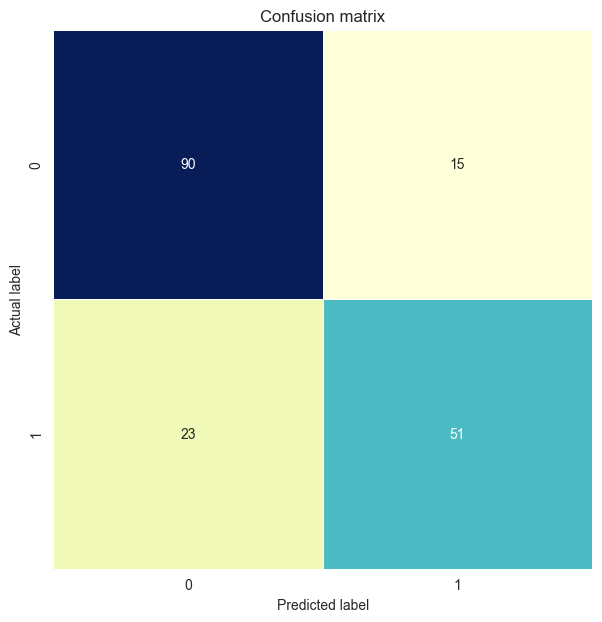

In [37]:
# Fit the logistic regression model to the training data
lr = LogisticRegression()
lr.fit(train_X, train_y)

# Predict the labels for the validation data
val_pred = lr.predict(test_X)

# Calculate F1 score, precision, and recall
f1 = f1_score(test_y, val_pred)
precision = precision_score(test_y, val_pred)
recall = recall_score(test_y, val_pred)

# Round the F1 score, precision, and recall to two decimal places
f1 = round(f1 * 100, 2)
precision = round(precision * 100, 2)
recall = round(recall * 100, 2)

# Create a confusion matrix for the validation data
conf_matrix = confusion_matrix(test_y, val_pred)

# Print the confusion matrix
print('Confusion matrix:')
print(pd.DataFrame(conf_matrix, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1']))

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, square=True, cmap='YlGnBu',cbar=False)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix')
plt.show()

In [38]:
# Print a classification report for the validation data
report = classification_report(test_y, val_pred)
print("Classification Report for Validation Data:")
print(report)

Classification Report for Validation Data:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       105
           1       0.77      0.69      0.73        74

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179



Based on the output: 

The logistic regression model achieved a validation accuracy of 78.77% on the test data, indicating that it correctly predicted the class for approximately 78.77% of the instances. The confusion matrix shows that out of 105 instances of class 0, 90 were correctly predicted, and out of 74 instances of class 1, 51 were correctly predicted. The precision and recall values indicate the model's performance for each class, with a balanced F1-score of 72.86%, suggesting an overall good balance between precision and recall for both classes.

**Decision Tree**

In [39]:
# Initialize the DecisionTreeClassifier with specified parameters
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# Fit the model
clf_gini.fit(train_X, train_y)

# Make predictions
y_pred_gini = clf_gini.predict(test_X)

# Evaluate model performance
accuracy_test = accuracy_score(test_y, y_pred_gini)
accuracy_train = accuracy_score(train_y, clf_gini.predict(train_X))
print(f'Validation accuracy for Decision Tree on {len(train_X)} train samples and {len(test_X)} test samples: {accuracy_test * 100:.2f}%')

Validation accuracy for Decision Tree on 712 train samples and 179 test samples: 79.89%


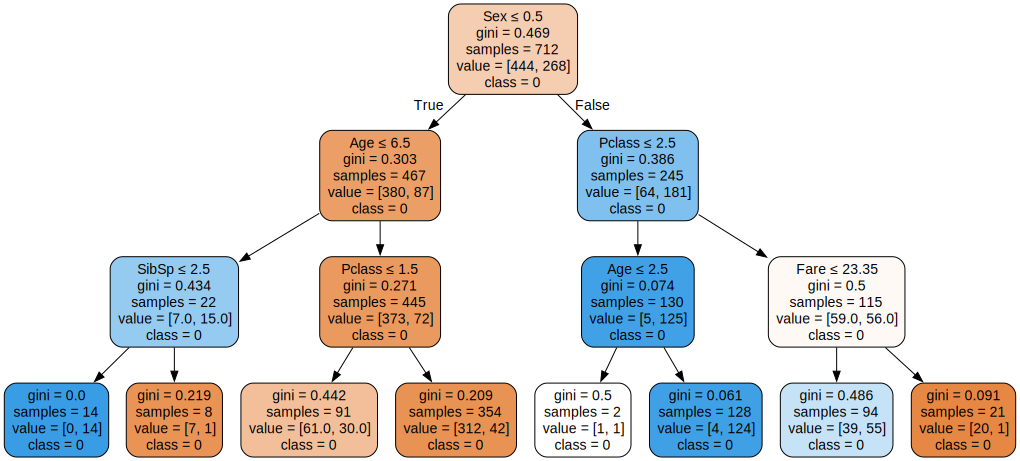

In [40]:
# Visualize the decision tree
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                                feature_names=train_X.columns,  
                                class_names=[str(c) for c in train_y],  
                                filled=True, rounded=True,  
                                special_characters=True)
graph = graphviz.Source(dot_data) 
graph

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           92           13
Actual 1           23           51


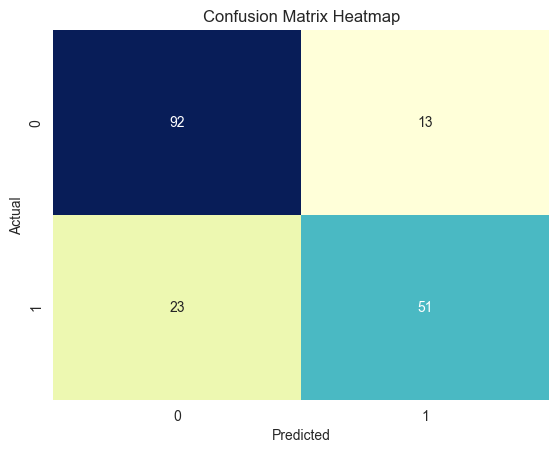


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [41]:
# Generate confusion matrix
conf_matrix = confusion_matrix(test_y, y_pred_gini)
print('Confusion Matrix:')
print(pd.DataFrame(conf_matrix, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1']))

# Plot heatmap for the confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='YlGnBu', fmt='d',cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Print classification report for precision, recall, f1-score
print('\nClassification Report:')
print(classification_report(test_y, y_pred_gini))

 Based on the output:

The decision tree classifier achieved an accuracy of 79.89% on the test data, indicating that it correctly predicted the class for approximately 79.89% of the instances. The confusion matrix shows that out of 105 instances of class 0, 92 were correctly predicted, and out of 74 instances of class 1, 51 were correctly predicted. The precision and recall values indicate how well the classifier performed for each class, with a balanced F1-score of 0.80, suggesting an overall good balance between precision and recall for both classes.

**Light Gradient Boosting Machine(Light GBM)**


Confusion Matrix:
                       Actual Positive: 1  Actual Negative: 0
Predicted Positive: 1                  88                  17
Predicted Negative: 0                  19                  55


  File "c:\Users\bearf\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


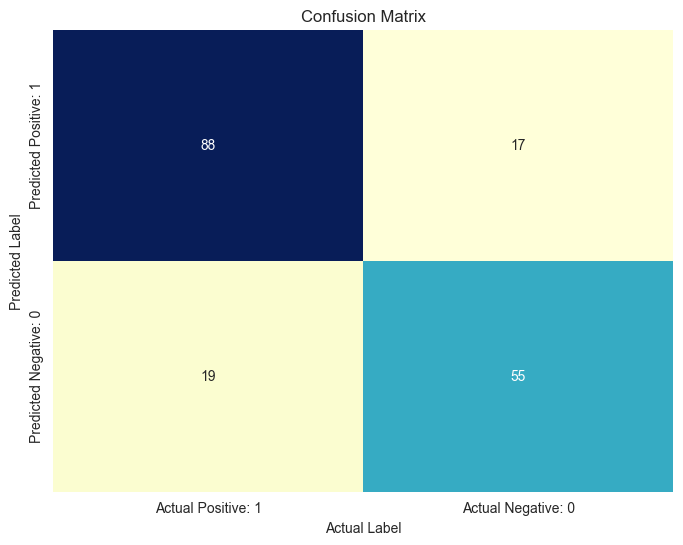


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179


Validation accuracy for LightGBM model on 712 train samples and 179 test samples: 79.89%


In [42]:
# Create a LGBMClassifier
lgbm = lgb.LGBMClassifier(silent=True,verbose=-1)

# Train the model
lgbm.fit(train_X, train_y)

# Predict
y_pred = lgbm.predict(test_X)

# Calculate confusion matrix
cm = confusion_matrix(test_y, y_pred)

# Create a DataFrame for the confusion matrix
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive: 1', 'Actual Negative: 0'], 
                         index=['Predicted Positive: 1', 'Predicted Negative: 0'])

# Print the confusion matrix and classification report
print('\nConfusion Matrix:')
print(cm_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu',cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.show()

print('\nClassification Report:')
print(classification_report(test_y, y_pred))

# Calculate accuracy
accuracy = accuracy_score(test_y, y_pred)

# Print the validation accuracy
print(f'\nValidation accuracy for LightGBM model on {len(train_X)} train samples and {len(test_X)} test samples: {accuracy*100:.2f}%')

Based on the output:

The LightGBM model achieved an accuracy of 79.89% on the test data, correctly predicting the class for approximately 79.89% of the instances. The confusion matrix reveals that out of 105 instances of class 0, 88 were correctly predicted, and out of 74 instances of class 1, 55 were correctly predicted. The precision and recall values indicate the model's performance for each class, with balanced F1-scores of 0.83 for class 0 and 0.75 for class 1. These results suggest an overall good balance between precision and recall for both classes.

**Neural Networks**

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5477 - loss: 0.6768 - val_accuracy: 0.7095 - val_loss: 0.5703
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7333 - loss: 0.5559 - val_accuracy: 0.8045 - val_loss: 0.4984
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8054 - loss: 0.4695 - val_accuracy: 0.7821 - val_loss: 0.4507
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8078 - loss: 0.4585 - val_accuracy: 0.7933 - val_loss: 0.4368
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8143 - loss: 0.4443 - val_accuracy: 0.8045 - val_loss: 0.4283
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8248 - loss: 0.4219 - val_accuracy: 0.8101 - val_loss: 0.4233
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8463 - loss: 0.3955 - val_accuracy: 0.8101 - val_loss: 0.4232
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8479 - loss: 0.3986 - val_accuracy: 0.8101 - v

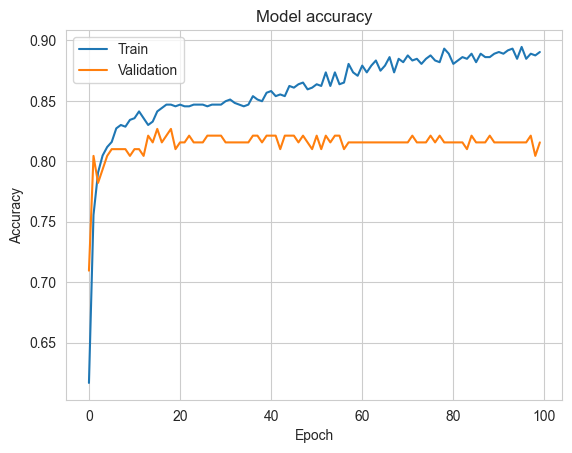

In [43]:
# Standardizing the features using StandardScaler
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

num_classes = 2  # Replace with the actual number of classes in your dataset

# Creating a sequential model using TensorFlow's Keras API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(train_X_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_X_scaled, train_y, epochs=100, batch_size=32, validation_data=(test_X_scaled, test_y), verbose=1)

# Visualize the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [44]:
accuracy = history.history['accuracy'][-1]  # Get the final training accuracy
print(f'Training Accuracy: {accuracy * 100:.2f}%')

# Evaluate the model on the test data
loss, test_accuracy = model.evaluate(test_X_scaled, test_y)
# Print the accuracy
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

val_accuracy = history.history['val_accuracy'][-1]  # Get the final validation accuracy

# Print the validation accuracy
print(f'Validation accuracy for neural network model on {len(train_X)} train samples and {len(test_X)} test samples: {val_accuracy * 100:.2f}%')

Training Accuracy: 89.04%
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - accuracy: 0.8224 - loss: 0.5034
Test accuracy: 81.56%
Validation accuracy for neural network model on 712 train samples and 179 test samples: 81.56%


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

Confusion matrix:
          Predicted 0  Predicted 1
Actual 0           92           13
Actual 1           20           54


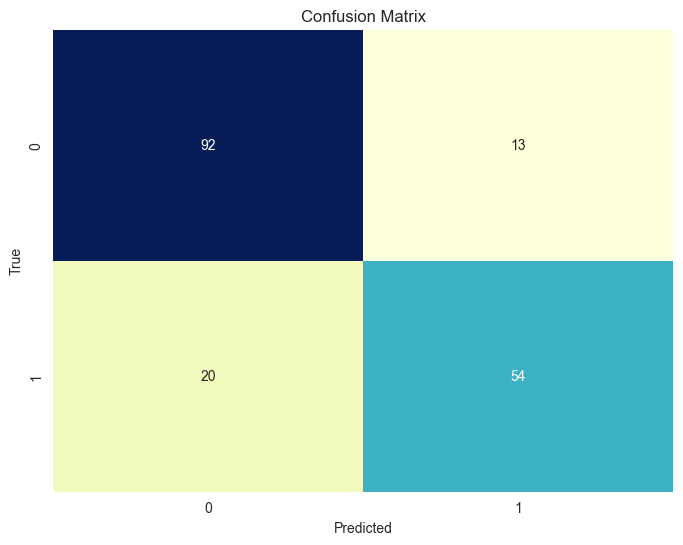

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



In [45]:
# Scale the test data using the previously fitted scaler
test_X_scaled = scaler.transform(test_X)

# Get the model predictions for the test set
test_predictions = model.predict(test_X_scaled)
test_pred_classes = np.argmax(test_predictions, axis=1)  # Convert softmax output to class predictions

# Generate confusion matrix
conf_matrix = confusion_matrix(test_y, test_pred_classes)

# Print the confusion matrix
print('\nConfusion matrix:')
print(pd.DataFrame(conf_matrix, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1']))

# Generate classification report
report = classification_report(test_y, test_pred_classes)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(report)

Based on the output:

The neural network model achieved an accuracy of 81.56% on the test data, correctly predicting the class for approximately 81.56% of the instances. The confusion matrix reveals that out of 105 instances of class 0, 92 were correctly predicted, and out of 74 instances of class 1, 54 were correctly predicted. The precision and recall values indicate the model's performance for each class, with balanced F1-scores of 0.85 for class 0 and 0.77 for class 1. It's important to note that these results suggest an overall good balance between precision and recall for both classes, and that the specific accuracy and performance metrics may vary slightly across different runs due to inherent randomness in the training process.

# **8. Evaluation**

In [46]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(train_X, train_y)
val_pred_lr = lr.predict(test_X)
accuracy_lr = accuracy_score(test_y, val_pred_lr)
accuracy_lr = round(accuracy_lr * 100, 2)
print(f'Validation accuracy for Logistic Regression on {len(train_X)} train samples and {len(test_X)} test samples: {accuracy_lr:.2f}%')

# Decision Tree
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(train_X, train_y)
y_pred_gini = clf_gini.predict(test_X)
accuracy_test_dt = accuracy_score(test_y, y_pred_gini)
print(f'Validation accuracy for Decision Tree on {len(train_X)} train samples and {len(test_X)} test samples: {accuracy_test_dt * 100:.2f}%')

# LightGBM model
lgbm = lgb.LGBMClassifier(silent=True,verbosity=-1)  # Use LGBMClassifier from the lightgbm package
lgbm.fit(train_X, train_y)
y_pred_lgbm = lgbm.predict(test_X)
accuracy_lgbm = accuracy_score(test_y, y_pred_lgbm)
print(f'Validation accuracy for LightGBM model on {len(train_X)} train samples and {len(test_X)} test samples: {accuracy_lgbm*100:.2f}%')

# Neural Network
accuracy_nn = history.history['val_accuracy'][-1] * 100
print(f'Validation accuracy for neural network model on {len(train_X)} train samples and {len(test_X)} test samples: {accuracy_nn:.2f}%')

Validation accuracy for Logistic Regression on 712 train samples and 179 test samples: 78.77%
Validation accuracy for Decision Tree on 712 train samples and 179 test samples: 79.89%
Validation accuracy for LightGBM model on 712 train samples and 179 test samples: 79.89%
Validation accuracy for neural network model on 712 train samples and 179 test samples: 81.56%


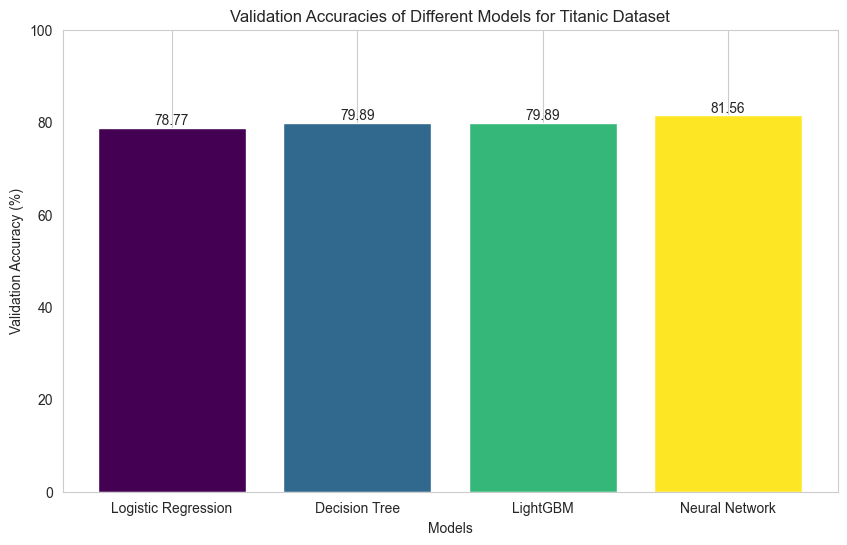

In [47]:
# Define the models and their corresponding accuracies
models = ['Logistic Regression', 'Decision Tree', 'LightGBM', 'Neural Network']
accuracies = [78.77, 79.89, 79.89, 81.56]

# Generating colors for the bar plot
colors = plt.cm.viridis(np.linspace(0, 1, len(models)))

# Creating a bar plot to visualize the validation accuracies of different models
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=colors)
plt.title('Validation Accuracies of Different Models for Titanic Dataset')
plt.xlabel('Models')
plt.ylabel('Validation Accuracy (%)')
plt.ylim(0, 100)
plt.grid(axis='y')

# Adding text labels to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

Based on the provided evaluation results: 

1. The neural network model had the highest accuracy at 81.56%, outperforming the decision tree and LightGBM models, which had similar accuracies at 79.89%.

2. The logistic regression model had the lowest accuracy at 78.77%.

3. There is potential for further improvement in all models through hyperparameter tuning, feature engineering, and exploring more advanced modeling techniques.

# **9. Deployment**

# **10. Feedback**